# Powerlifting

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly as pt
import plotly.express as px
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
import plotly.graph_objs as go
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

In [4]:
powerlifting = pd.read_csv("https://raw.githubusercontent.com/michelepasqualini/Project_DataScience/main/Powerlifting/openpowerlifting.csv")
powerlifting.head()

MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
3       0       Dawn Bogart   F         Raw  42.0  Open Senior         58.51   
4       0      Destiny Dula   F         Raw  18.0   Teen 18-19         63.68   

  WeightClassKg  Squat4Kg  BestSquatKg  Bench4Kg  BestBenchKg  Deadlift4Kg  \
0            60       NaN        47.63       NaN        20.41          NaN   
1            60       NaN       142.88       NaN        95.25          NaN   
2            60       NaN       142.88       NaN        95.25          NaN   
3            60       NaN          NaN       NaN        95.25          NaN   
4          67.5       NaN          NaN       NaN        31.75          NaN   

   BestDeadliftKg  TotalKg Place   Wilks  
0           70.31   138.35     1  155.05  
1          163.29   401.42     1  456.38  
2          163.29   401.42     1  456.38  
3             NaN    95.25     1  108.29  
4           90.72   122.47     1  130.47

In [5]:
meets = pd.read_csv("https://raw.githubusercontent.com/michelepasqualini/Project_DataScience/main/Powerlifting/meets.csv")
meets.head()

MeetID        MeetPath Federation        Date MeetCountry MeetState  \
0       0  365strong/1601  365Strong  2016-10-29         USA        NC   
1       1  365strong/1602  365Strong  2016-11-19         USA        MO   
2       2  365strong/1603  365Strong  2016-07-09         USA        NC   
3       3  365strong/1604  365Strong  2016-06-11         USA        SC   
4       4  365strong/1605  365Strong  2016-04-10         USA        SC   

    MeetTown                                           MeetName  
0  Charlotte  2016 Junior & Senior National Powerlifting Cha...  
1      Ozark                  Thanksgiving Powerlifting Classic  
2  Charlotte                             Charlotte Europa Games  
3  Rock Hill                   Carolina Cup Push Pull Challenge  
4  Rock Hill                              Eastern USA Challenge

In [6]:
openpowerlifting = pd.merge(left=powerlifting, right=meets, how='inner', on='MeetID')
openpowerlifting.head()

MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
3       0       Dawn Bogart   F         Raw  42.0  Open Senior         58.51   
4       0      Destiny Dula   F         Raw  18.0   Teen 18-19         63.68   

  WeightClassKg  Squat4Kg  BestSquatKg  ...  TotalKg  Place   Wilks  \
0            60       NaN        47.63  ...   138.35      1  155.05   
1            60       NaN       142.88  ...   401.42      1  456.38   
2            60       NaN       142.88  ...   401.42      1  456.38   
3            60       NaN          NaN  ...    95.25      1  108.29   
4          67.5       NaN          NaN  ...   122.47      1  130.47   

         MeetPath  Federation        Date  MeetCountry MeetState   MeetTown  \
0  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   
1  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   
2  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   
3  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   
4  365strong/1601   365Strong  2016-10-29          USA        NC  Charlotte   

                                            MeetName  
0  2016 Junior & Senior National Powerlifting Cha...  
1  2016 Junior & Senior National Powerlifting Cha...  
2  2016 Junior & Senior National Powerlifting Cha...  
3  2016 Junior & Senior National Powerlifting Cha...  
4  2016 Junior & Senior National Powerlifting Cha...  

[5 rows x 24 columns]

In [7]:
openpowerlifting.describe()

MeetID            Age   BodyweightKg     Squat4Kg  \
count  386414.000000  147147.000000  384012.000000  1243.000000   
mean     5143.015804      31.668237      86.934912   107.036404   
std      2552.099838      12.900342      23.140843   166.976620   
min         0.000000       5.000000      15.880000  -440.500000   
25%      2979.000000      22.000000      70.300000    87.500000   
50%      5960.000000      28.000000      83.200000   145.000000   
75%      7175.000000      39.000000     100.000000   212.500000   
max      8481.000000      95.000000     242.400000   450.000000   

         BestSquatKg     Bench4Kg    BestBenchKg  Deadlift4Kg  BestDeadliftKg  \
count  298071.000000  1962.000000  356364.000000  2800.000000   317847.000000   
mean      176.569941    45.722905     118.347509   113.597193      195.040633   
std        69.222785   151.668221      54.848850   170.201657       61.580675   
min      -477.500000  -360.000000    -522.500000  -461.000000     -410.000000   
25%       127.500000   -90.000000      79.380000   110.000000      147.500000   
50%       174.630000    90.250000     115.000000   157.500000      195.000000   
75%       217.720000   167.500000     150.000000   219.990000      238.140000   
max       573.790000   378.750000     488.500000   418.000000      460.400000   

             TotalKg          Wilks  
count  363237.000000  362194.000000  
mean      424.000249     301.080601  
std       196.355147     116.360396  
min        11.000000      13.730000  
25%       272.160000     237.380000  
50%       424.110000     319.660000  
75%       565.000000     379.290000  
max      1365.310000     779.380000

In [8]:
openpowerlifting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386414 entries, 0 to 386413
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
 17  MeetPath  

In [9]:
openpowerlifting.isnull().sum()
#openpowerlifting.isna().any()

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
MeetPath               0
Federation             0
Date                   0
MeetCountry            0
MeetState          72143
MeetTown           94000
MeetName               0
dtype: int64

In [10]:
lst = []
for cname in openpowerlifting.columns.tolist():
    percentage = round((100*openpowerlifting[cname].isna().sum()/openpowerlifting[cname].isna().count()), 2)
    lst.append((cname, percentage))

lst.sort(reverse=True, key = lambda x: x[1])

for element in lst:
    print(element[0] + ": " + str(element[1]) + "%")

Squat4Kg: 99.68%
Bench4Kg: 99.49%
Deadlift4Kg: 99.28%
Age: 61.92%
MeetTown: 24.33%
BestSquatKg: 22.86%
MeetState: 18.67%
BestDeadliftKg: 17.74%
BestBenchKg: 7.78%
Wilks: 6.27%
TotalKg: 6.0%
Division: 4.1%
WeightClassKg: 0.99%
BodyweightKg: 0.62%
Place: 0.28%
MeetID: 0.0%
Name: 0.0%
Sex: 0.0%
Equipment: 0.0%
MeetPath: 0.0%
Federation: 0.0%
Date: 0.0%
MeetCountry: 0.0%
MeetName: 0.0%


## Data cleaning

In [11]:
#arrotondamento dell'eta
openpowerlifting['Age']=openpowerlifting['Age'].apply(np.floor)

In [12]:
openpowerlifting = openpowerlifting[(openpowerlifting['BestSquatKg']>0)]
openpowerlifting = openpowerlifting[(openpowerlifting['BestBenchKg']>0)]
openpowerlifting = openpowerlifting[(openpowerlifting['BestDeadliftKg']>0)]

In [13]:
openpowerlifting = openpowerlifting.drop(["Squat4Kg", "Deadlift4Kg", "Bench4Kg"], axis=1)
openpowerlifting.head()

MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
5       0   Courtney Norris   F       Wraps  28.0  Open Senior         62.41   
6       0     Maureen Clary   F         Raw  60.0    Mst 60-64         67.31   

  WeightClassKg  BestSquatKg  BestBenchKg  ...  TotalKg  Place   Wilks  \
0            60        47.63        20.41  ...   138.35      1  155.05   
1            60       142.88        95.25  ...   401.42      1  456.38   
2            60       142.88        95.25  ...   401.42      1  456.38   
5          67.5       170.10        77.11  ...   392.36      1  424.40   
6          67.5       124.74        95.25  ...   383.28      1  391.98   

         MeetPath Federation        Date MeetCountry MeetState   MeetTown  \
0  365strong/1601  365Strong  2016-10-29         USA        NC  Charlotte   
1  365strong/1601  365Strong  2016-10-29         USA        NC  Charlotte   
2  365strong/1601  365Strong  2016-10-29         USA        NC  Charlotte   
5  365strong/1601  365Strong  2016-10-29         USA        NC  Charlotte   
6  365strong/1601  365Strong  2016-10-29         USA        NC  Charlotte   

                                            MeetName  
0  2016 Junior & Senior National Powerlifting Cha...  
1  2016 Junior & Senior National Powerlifting Cha...  
2  2016 Junior & Senior National Powerlifting Cha...  
5  2016 Junior & Senior National Powerlifting Cha...  
6  2016 Junior & Senior National Powerlifting Cha...  

[5 rows x 21 columns]

## Data visualization

#### Male vs Female distribution in the dataset

In [14]:
labels = ['Male','Female']
colors = ['#1e90ff', '#E1396C']
gender = openpowerlifting['Sex'].value_counts()
values = list(gender.values)

trace = go.Pie(labels=labels, values=values,hoverinfo='label+percent',marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='gender_chart')

#### Age distribution of powerlifters

In [15]:
age = openpowerlifting['Age'].value_counts()
x = age.index
y = age.values

layout = go.Layout(
    title='Age distribution of Powerlifters',
    xaxis=dict(
        title='Age',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Number of Powerlifters',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [go.Bar(
            x=x,
            y=y
    )]
py.iplot(go.Figure(data=data, layout=layout))

#### Distribution of Bodyweight of Powerlifters

In [16]:
weight = openpowerlifting['BodyweightKg'].round()
print(weight)

0          60.0
1          59.0
2          59.0
5          62.0
6          67.0
          ...  
386379    137.0
386380    137.0
386381    180.0
386382    146.0
386383    166.0
Name: BodyweightKg, Length: 286645, dtype: float64


In [17]:
weight = weight.value_counts()
x = weight.index
y = weight.values

layout = go.Layout(
    title='Weight distribution of Powerlifters',
    xaxis=dict(
        title='Weight',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Number of Powerlifters',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [go.Bar(
            x=x,
            y=y
    )]
py.iplot(go.Figure(data=data, layout=layout))

In [18]:
from plotly import tools
ag = openpowerlifting.groupby(['Age']).mean()
deadlift = go.Scatter(
    x = ag.index,
    y = ag['BestDeadliftKg'],
    mode='markers',
    name='Deadlift'
)
Squat = go.Scatter(
    x = ag.index,
    y = ag['BestSquatKg'],
    mode='markers',
    name='Squat'

)
Bench = go.Scatter(
    x = ag.index,
    y = ag['BestBenchKg'],
    mode='markers',
    name='Bench'
)

Total = go.Scatter(
    x = ag.index,
    y = ag['TotalKg'],
    mode='markers',
    name='Total'
 
)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Max Deadlift', 'Max Squat',
                                                          'Max Benchpress','Total Kgs'))

fig.append_trace(deadlift, 1, 1)
fig.append_trace(Squat, 1, 2)
fig.append_trace(Bench, 2, 1)
fig.append_trace(Total, 2, 2)


fig['layout'].update(height=800, width=1000, title='Age of Powerlifters' +
                                                  ' with respect to parameters')

py.iplot(fig, filename='sub')

In [19]:
ag = openpowerlifting.groupby(['Age']).mean()
wt =  openpowerlifting.groupby(['BodyweightKg']).mean()
data = [
    {
        'x': ag.index,
        'y': ag['Wilks'],
        'mode': 'lines+markers',
        'name': 'Wilks-Coefficient',
    }
]

layout = dict(title = 'Wilks Coefficient Distribution with respect to the Age of Powerlifters',
              yaxis = dict(title = 'Wilks Coefficient', zeroline = False),
              xaxis = dict(title= 'Age',zeroline = False)
             )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='scatter')

In [20]:
above = wt[wt['Wilks'] > 300]
below = wt[wt['Wilks'] < 300]


trace0 = go.Scatter(
    x = above.index,
    y = above['Wilks'],
    name = 'Above 300',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = below.index,
    y = below['Wilks'],
    name = 'Below 300',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Wilks Coefficient Distribution with respect to the Weight of Powerlifters',
              yaxis = dict(title = 'Wilks Coefficient', zeroline = False),
              xaxis = dict(title= 'Weight in Kg',zeroline = False)
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [21]:
openpowerlifting_corr=openpowerlifting.drop(["MeetID","TotalKg"], axis=1)

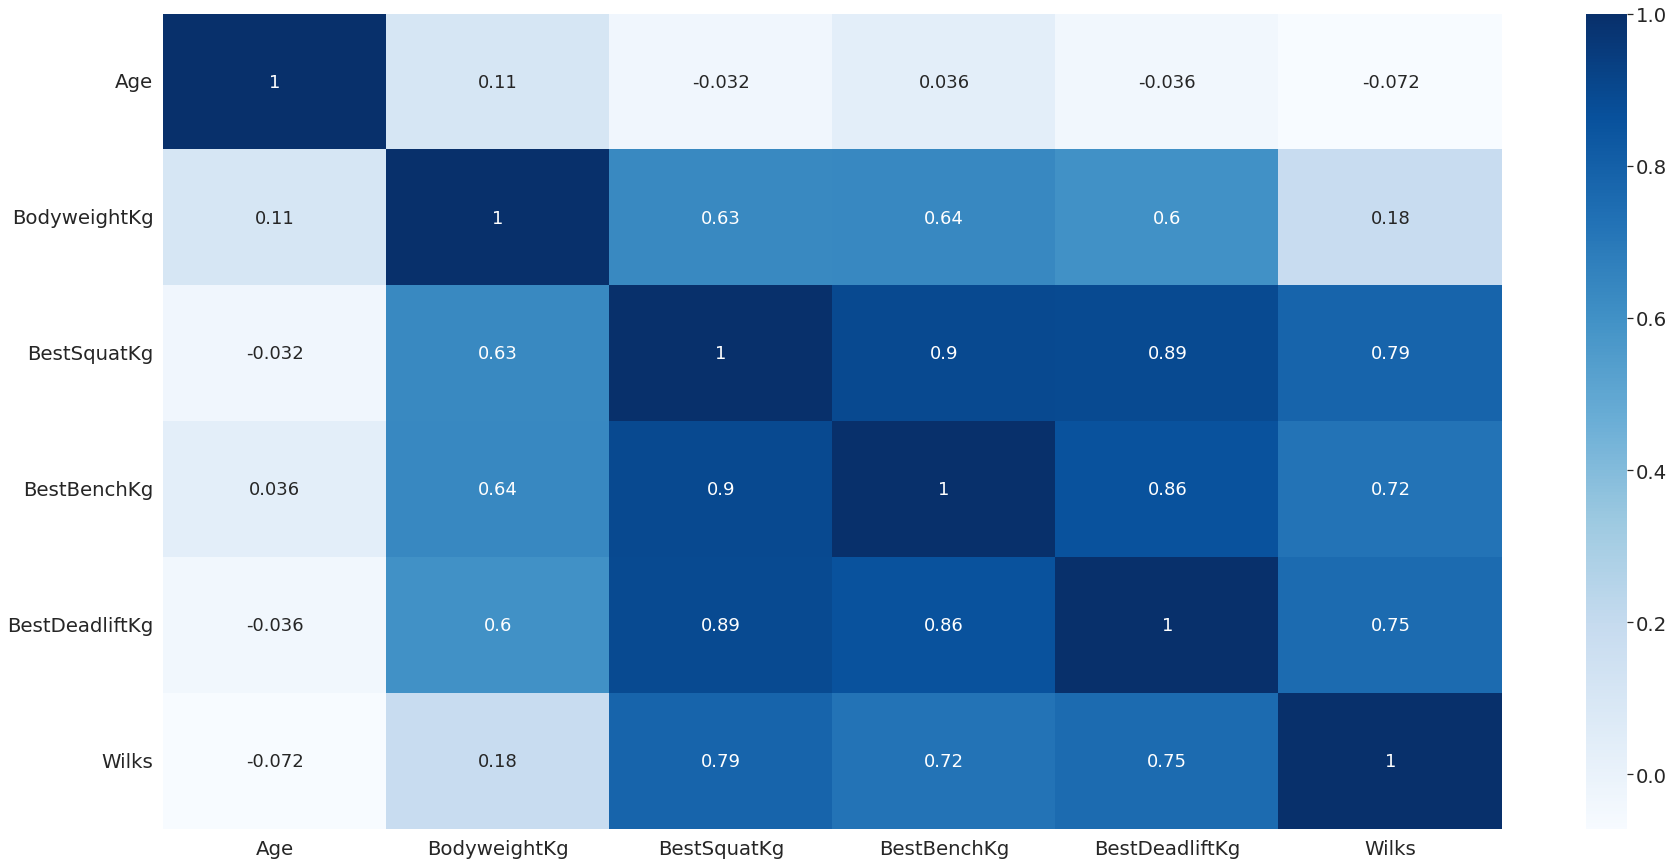

In [22]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(openpowerlifting_corr[openpowerlifting_corr.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [23]:
data = [
    {
        'x': openpowerlifting['Age'],
        'y': openpowerlifting['BestSquatKg'],
        'mode': 'markers',
        'name': 'Best squat Kg',
    }
]

layout = dict(title = 'Best squat kg for age',
              yaxis = dict(title = 'Best squat Kg', zeroline = False),
              xaxis = dict(title= 'Age',zeroline = False)
             )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='scat')

## Clustering

#### K-Means

In [24]:
x = openpowerlifting[["Age", "BodyweightKg", "Wilks"]].dropna()
#x = openpowerlifting.dropna()
#x=x[(x['Age']>0)]
#x = openpowerlifting.iloc[:, [4, 9]].dropna()
x=x[:400].values
#x=x.values
# let's check the shape of x
print(x.shape)

(400, 3)


Text(0, 0.5, 'wcss')

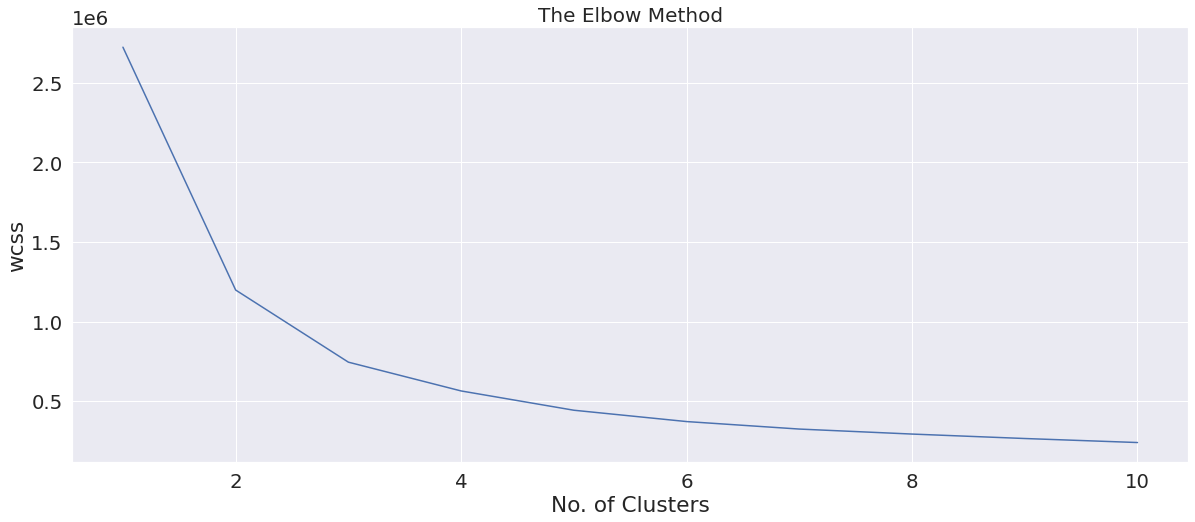

In [25]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

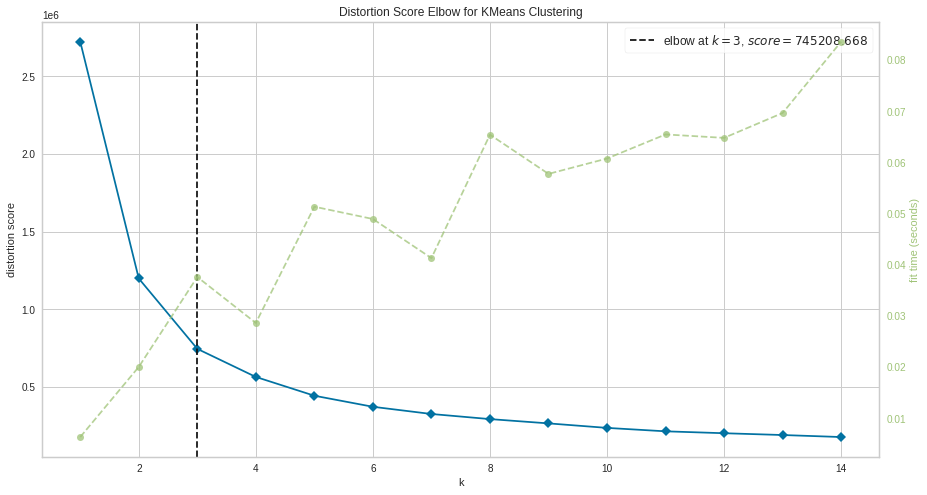

In [26]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))
plt.figure(figsize=(15,8))
visualizer.fit(x)
visualizer.poof()

In [27]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

'''
plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
#plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
#plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('BestBenchKg')

plt.legend()
plt.show()
'''

"\nplt.figure(figsize=(15,8))\nplt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')\nplt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')\nplt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')\n#plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')\n#plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')\nplt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')\n\nplt.title('K Means Clustering', fontsize = 20)\nplt.xlabel('Age')\nplt.ylabel('BestBenchKg')\n\nplt.legend()\nplt.show()\n"

In [28]:
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'BodyWeight'),zaxis = dict(title  = 'Willks'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = km.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.add_scatter3d(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],z=km.cluster_centers_[:,2],mode='markers')
#fig.update_legend(legend=)
#fig.update_layout(showlegend=True)
fig.show()
#silhoutte

### Cluster all

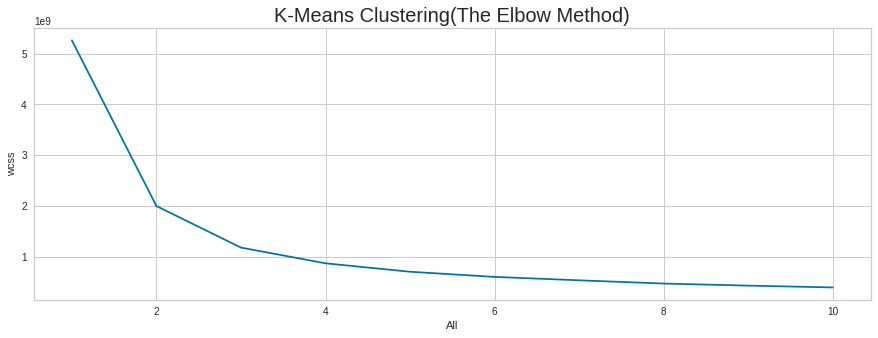

In [29]:
from sklearn.cluster import KMeans

openpowerlifting["Sex"] = openpowerlifting["Sex"].apply(lambda x: 1 if x == "F" else 0)
x = openpowerlifting.drop(["MeetID","Name","Equipment","Division","WeightClassKg","Place", "MeetPath", "Federation", "Date", "MeetCountry", "MeetState", "MeetTown", "MeetName"], axis=1).dropna().values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)
#togliere componenti fortemente correlati

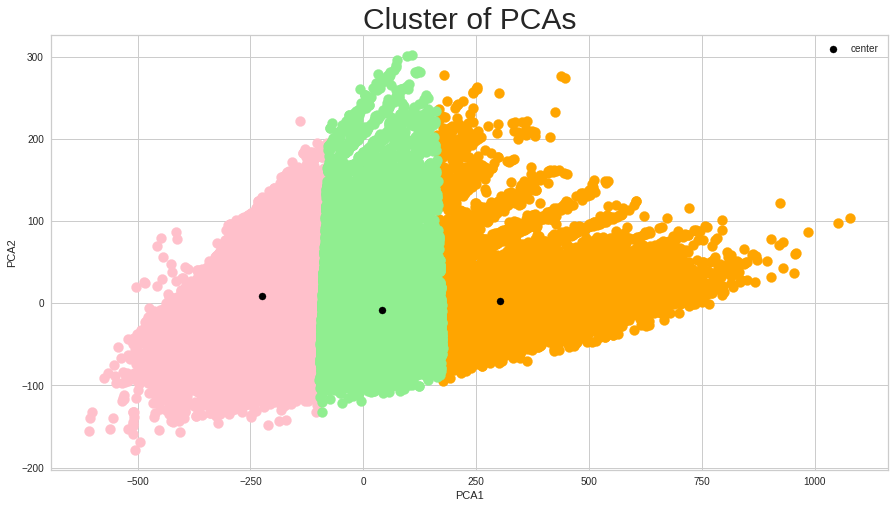

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
#plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
#plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
#plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
#print silhoutte

### DBSCAN

In [32]:
x=x[:2000]
pca_x=pca_x[:2000]

print(pca_x.shape)

(2000, 2)


Text(0, 0.5, 'Distance')

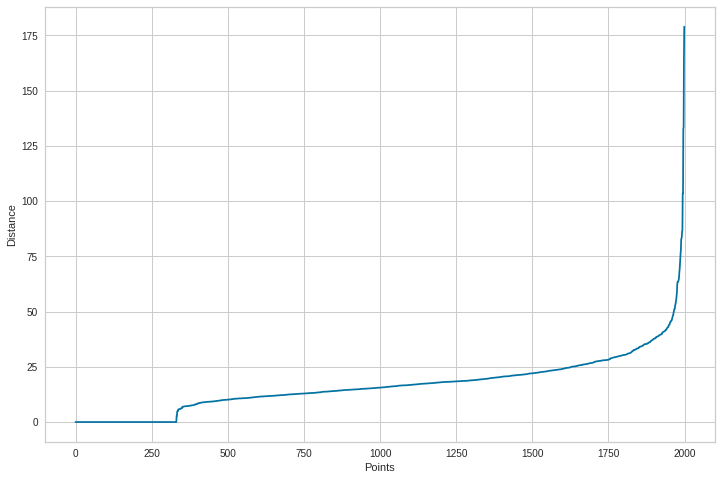

In [33]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
#distances = np.sort(distances[:,10], axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])
#plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

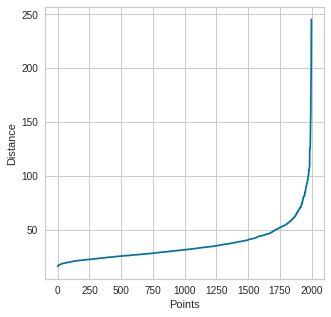

In [34]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(x)
distances, indices = neighbors.kneighbors(x)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

52.63281960906141


<Figure size 360x360 with 0 Axes>

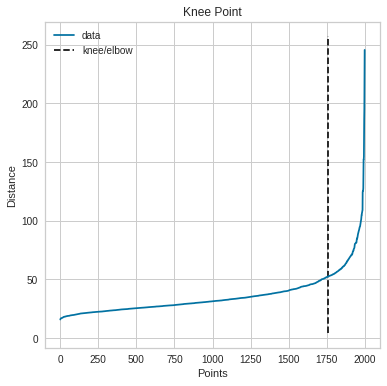

In [35]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [36]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=50, min_samples=10).fit(x)
ymeans = db.labels_
ymeans

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

No handles with labels found to put in legend.


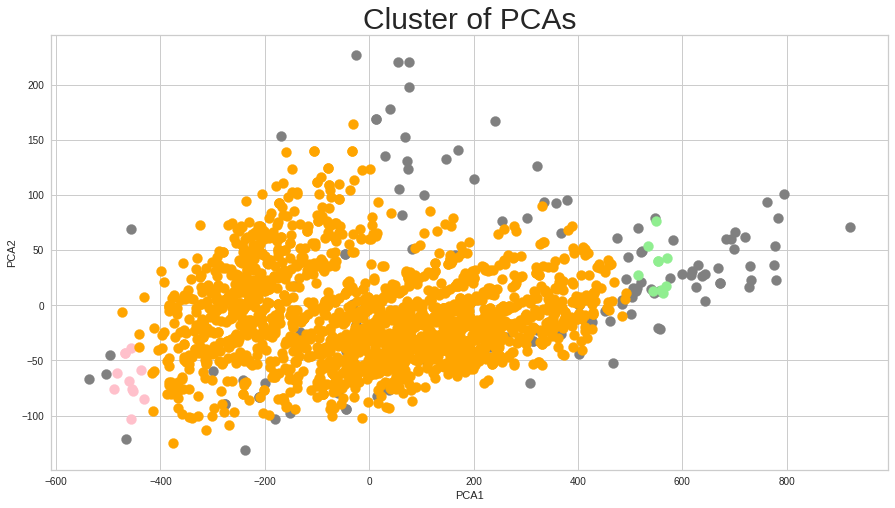

In [37]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
#plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
#plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
#plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
#lasciare e dire considerazioni
#cluster in 3d
#silhoutte

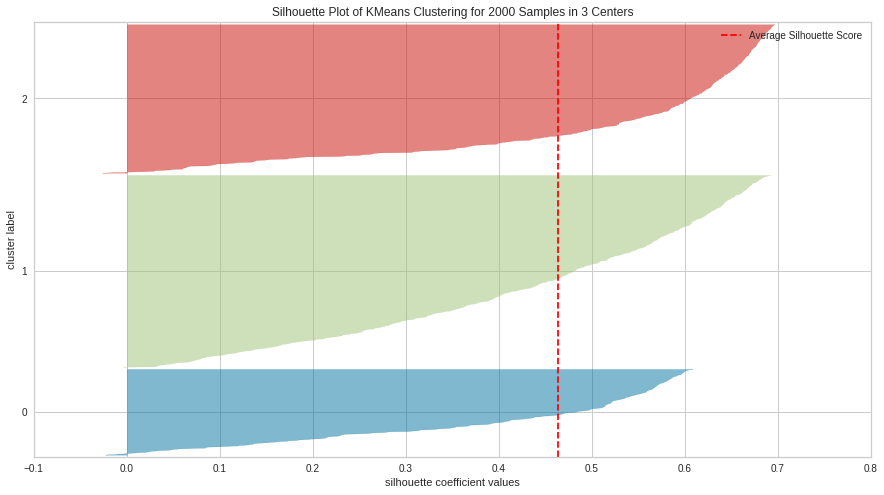

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
#descrivere i cluster

## Regression

In [39]:
openpowerlifting.isnull().sum(axis = 0)

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               179818
Division           13647
BodyweightKg         599
WeightClassKg       1811
BestSquatKg            0
BestBenchKg            0
BestDeadliftKg         0
TotalKg              454
Place                735
Wilks               1047
MeetPath               0
Federation             0
Date                   0
MeetCountry            0
MeetState          45283
MeetTown           72674
MeetName               0
dtype: int64

In [40]:
df = openpowerlifting.drop(["MeetID","Name","Equipment","Division","WeightClassKg","Place", "MeetPath", "Federation", "Date", "MeetCountry", "MeetState", "MeetTown", "MeetName"], axis=1).dropna()
df.head()

Sex   Age  BodyweightKg  BestSquatKg  BestBenchKg  BestDeadliftKg  TotalKg  \
0    1  47.0         59.60        47.63        20.41           70.31   138.35   
1    1  42.0         58.51       142.88        95.25          163.29   401.42   
2    1  42.0         58.51       142.88        95.25          163.29   401.42   
5    1  28.0         62.41       170.10        77.11          145.15   392.36   
6    1  60.0         67.31       124.74        95.25          163.29   383.28   

    Wilks  
0  155.05  
1  456.38  
2  456.38  
5  424.40  
6  391.98

In [41]:
#df.isnull().sum(axis = 0)
df.describe

<bound method NDFrame.describe of         Sex   Age  BodyweightKg  BestSquatKg  BestBenchKg  BestDeadliftKg  \
0         1  47.0         59.60        47.63        20.41           70.31   
1         1  42.0         58.51       142.88        95.25          163.29   
2         1  42.0         58.51       142.88        95.25          163.29   
5         1  28.0         62.41       170.10        77.11          145.15   
6         1  60.0         67.31       124.74        95.25          163.29   
...     ...   ...           ...          ...          ...             ...   
385410    0  23.0        121.25       285.00       180.00          290.00   
385412    0  25.0         93.75       275.00       140.00          300.00   
385413    0  27.0        109.00       330.00       210.00          310.00   
385414    0  37.0        118.00       375.00       220.00          320.00   
385416    0  44.0        152.50       345.00       190.00          370.00   

        TotalKg   Wilks  
0        138.35

In [42]:
df.head()

Sex   Age  BodyweightKg  BestSquatKg  BestBenchKg  BestDeadliftKg  TotalKg  \
0    1  47.0         59.60        47.63        20.41           70.31   138.35   
1    1  42.0         58.51       142.88        95.25          163.29   401.42   
2    1  42.0         58.51       142.88        95.25          163.29   401.42   
5    1  28.0         62.41       170.10        77.11          145.15   392.36   
6    1  60.0         67.31       124.74        95.25          163.29   383.28   

    Wilks  
0  155.05  
1  456.38  
2  456.38  
5  424.40  
6  391.98

In [43]:
# Data Normalization
names = df.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(df[["Age", "BodyweightKg",	"BestSquatKg",	"BestBenchKg",	"BestDeadliftKg","TotalKg","Wilks"]])
df[["Age", "BodyweightKg","BestSquatKg","BestBenchKg","BestDeadliftKg","TotalKg","Wilks"]] = scaled_d
df.head()

Sex       Age  BodyweightKg  BestSquatKg  BestBenchKg  BestDeadliftKg  \
0    1  0.465116      0.162620     0.063578     0.031255        0.136238   
1    1  0.406977      0.157627     0.241532     0.203123        0.353481   
2    1  0.406977      0.157627     0.241532     0.203123        0.353481   
5    1  0.244186      0.175492     0.292387     0.161465        0.311098   
6    1  0.616279      0.197939     0.207641     0.203123        0.353481   

    TotalKg     Wilks  
0  0.075314  0.168834  
1  0.273940  0.569993  
2  0.273940  0.569993  
5  0.267100  0.527418  
6  0.260244  0.484257

In [44]:
df['Sex'] = pd.Series(df['Sex'])

# Class balance
female = df[df.Sex == 1]
male = df[df.Sex == 0]
print(" F: ", len(female), " M: ", len(male))

 F:  34576  M:  72129


In [45]:
balanced_d = pd.concat([female, male.sample(len(female))])
#print(balanced_d)
y = balanced_d[['BestSquatKg']]
x = balanced_d.drop(['BestSquatKg'],axis=1)
#y = pd.cut(y.BestSquatKg,bins=[0,0.30,0.99],labels=[0,1])
print(y)

balanced_d.shape

        BestSquatKg
0          0.063578
1          0.241532
2          0.241532
5          0.292387
6          0.207641
...             ...
373843     0.493041
331698     0.614479
306611     0.268846
380256     0.572443
244678     0.306212

[69152 rows x 1 columns]


(69152, 8)

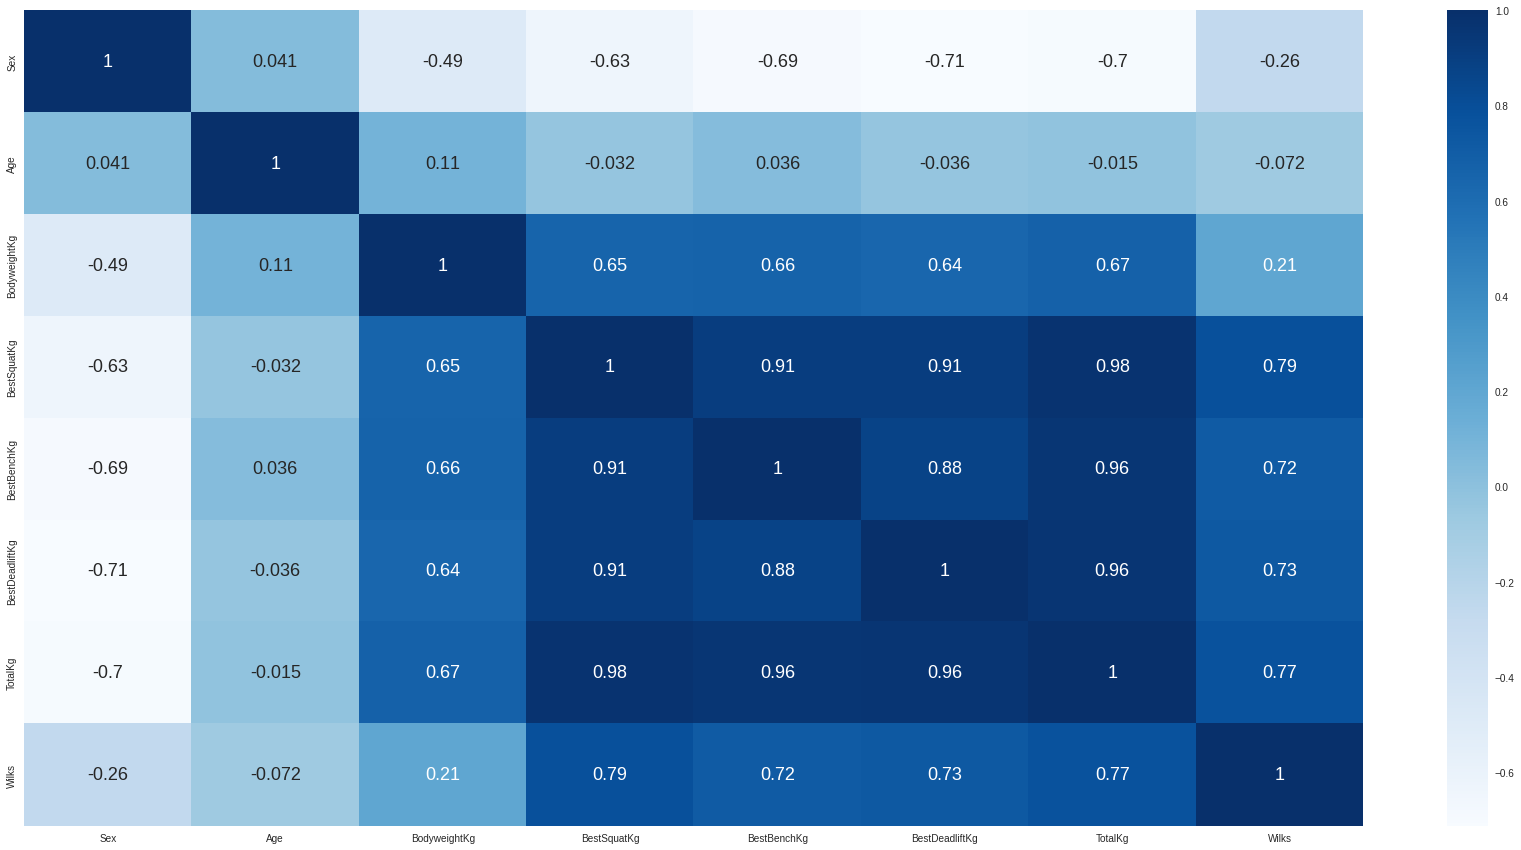

In [46]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(df[df.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [47]:
# Drop values to avoid variables with too high correlation
x = x.drop(['TotalKg','BestDeadliftKg', 'BestBenchKg'], axis=1)



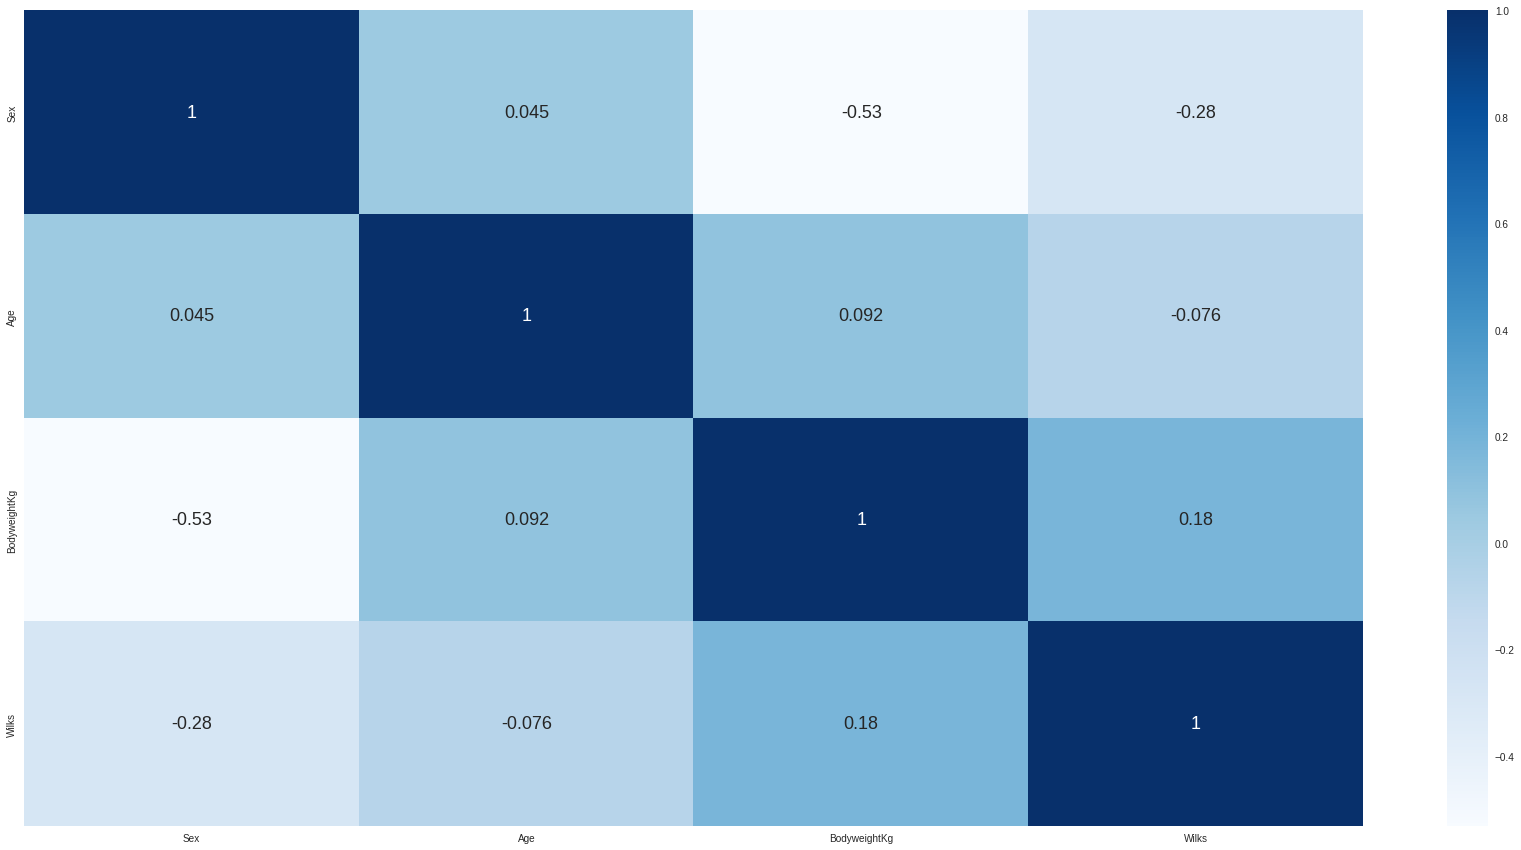

In [48]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [49]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(48406, 4)
(20746, 4)
(48406, 1)
(20746, 1)


In [50]:
# List of classifiers:
classifiers = [
    LinearRegression(),
    SVR(kernel='poly'),
    GradientBoostingRegressor(n_estimators=10,random_state=rs),
    AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',n_estimators=10, random_state=rs),
    RandomForestRegressor(n_estimators = 10, random_state=rs),
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

#kfold = StratifiedKFold(n_splits=5) #cross-validation

cv_results = [] # scores from cross validation

#cv_acc = [] # mean accuracy from cross validation, need to maximize
#cv_std = [] # standard deviation from cross validation, need to minimise

#cnfm = [] #confusion matrix
#clr = [] #classification report
#roc_auc = [] #roc curve:
#roc_tpr = []
#roc_fpr = []


In [51]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred,name, cv_result):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('Model: ', name)
    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

    dict = {'name':name, 'variance': round(explained_variance,4),'r2':round(r2,4),'mae':round(mean_absolute_error,4),'mse':round(mse,4),'rmse':round(np.sqrt(mse),4)}
    cv_results.append(dict)

In [52]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    regression_results(y_test, y_pred, name, cv_results)
    #accuracy and log loss
    #cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "r2",cv = kfold))
    #acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    #train_pred = clf.predict_proba(x_test)
    #print(f'Accuracy: {acc} \t ---> {name} ')
    
    # define model evaluation method
    #cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    #cv_results.append(cross_val_score(clf, x_train, y_train, scoring="r2", cv=5, n_jobs=-1))
    #r2 = round(cv_results[-1], 2)
    #train_pred = clf.predict_proba(x_test)
    #print(f'R-square: {r2} \t ---> {name} ')
    #confusion matrix, clasification report, roc curve
    #cnfm.append(confusion_matrix(y_test, y_pred))
    #clr.append(regression_results(y_test, y_pred))
    #print(y_test.head)
    #print(y_test.size)
    #print(y_pred)
    #print(y_pred.size)



    

Model:  LinearRegression
explained_variance:  0.9334
r2:  0.9334
MAE:  0.0243
MSE:  0.0011
RMSE:  0.0329
Model:  SVR
explained_variance:  0.9303
r2:  0.9303
MAE:  0.0253
MSE:  0.0011
RMSE:  0.0337
Model:  GradientBoostingRegressor
explained_variance:  0.7726
r2:  0.7726
MAE:  0.0469
MSE:  0.0037
RMSE:  0.0609
Model:  AdaBoostRegressor
explained_variance:  0.8911
r2:  0.8906
MAE:  0.0326
MSE:  0.0018
RMSE:  0.0422
Model:  RandomForestRegressor
explained_variance:  0.9636
r2:  0.9636
MAE:  0.0175
MSE:  0.0006
RMSE:  0.0243


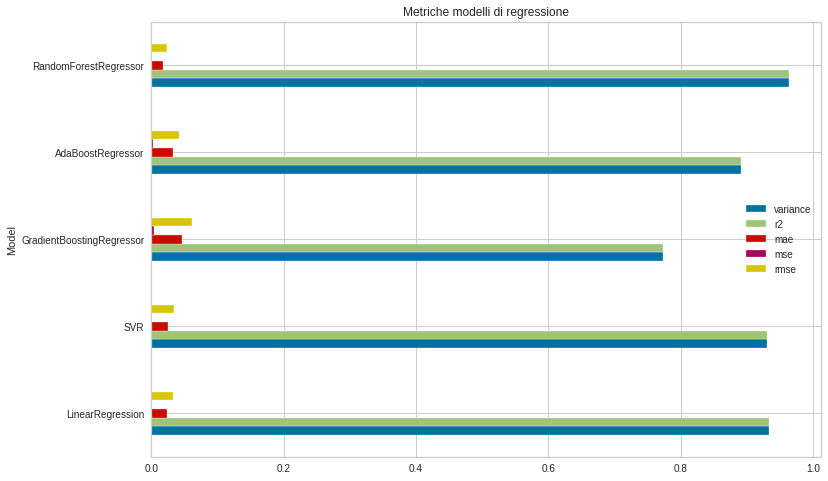

In [53]:
#plt.figure(figsize=(12,6))
#sns.barplot(x='name', y=['variance','r2','mae','mse','rmse'], data=cv_results)
df_results = pd.DataFrame(cv_results)
df_results.plot(x="name", y=['variance','r2','mae','mse','rmse'], kind="barh",figsize=(12,8))
plt.ylabel("Model")
plt.title("Metriche modelli di regressione")
plt.show()

## Classification

In [54]:
openpowerlifting.isnull().sum(axis = 0)

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               179818
Division           13647
BodyweightKg         599
WeightClassKg       1811
BestSquatKg            0
BestBenchKg            0
BestDeadliftKg         0
TotalKg              454
Place                735
Wilks               1047
MeetPath               0
Federation             0
Date                   0
MeetCountry            0
MeetState          45283
MeetTown           72674
MeetName               0
dtype: int64

In [55]:
#dati già normalizzati da openpwlift
df_classification = openpowerlifting.drop(["MeetID","Name","Equipment","Division","WeightClassKg","Place", "MeetPath", "Federation", "Date", "MeetCountry", "MeetState", "MeetTown", "MeetName"], axis=1).dropna()
df_classification.head()

Sex   Age  BodyweightKg  BestSquatKg  BestBenchKg  BestDeadliftKg  TotalKg  \
0    1  47.0         59.60        47.63        20.41           70.31   138.35   
1    1  42.0         58.51       142.88        95.25          163.29   401.42   
2    1  42.0         58.51       142.88        95.25          163.29   401.42   
5    1  28.0         62.41       170.10        77.11          145.15   392.36   
6    1  60.0         67.31       124.74        95.25          163.29   383.28   

    Wilks  
0  155.05  
1  456.38  
2  456.38  
5  424.40  
6  391.98

In [56]:
names = df_classification.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(df[["Age", "BodyweightKg",	"BestSquatKg",	"BestBenchKg",	"BestDeadliftKg","TotalKg","Wilks"]])
df_classification[["Age", "BodyweightKg","BestSquatKg","BestBenchKg","BestDeadliftKg","TotalKg","Wilks"]] = scaled_d
df_classification.head()

Sex       Age  BodyweightKg  BestSquatKg  BestBenchKg  BestDeadliftKg  \
0    1  0.465116      0.162620     0.063578     0.031255        0.136238   
1    1  0.406977      0.157627     0.241532     0.203123        0.353481   
2    1  0.406977      0.157627     0.241532     0.203123        0.353481   
5    1  0.244186      0.175492     0.292387     0.161465        0.311098   
6    1  0.616279      0.197939     0.207641     0.203123        0.353481   

    TotalKg     Wilks  
0  0.075314  0.168834  
1  0.273940  0.569993  
2  0.273940  0.569993  
5  0.267100  0.527418  
6  0.260244  0.484257

In [57]:
df_classification['Sex'] = pd.Series(df_classification['Sex'])

# Class balance
female = df_classification[df_classification.Sex == 1]
male = df_classification[df_classification.Sex == 0]
print(" F: ", len(female), " M: ", len(male))

 F:  34576  M:  72129


In [58]:
balanced_d = pd.concat([female, male.sample(len(female))])
#print(balanced_d)
y = balanced_d[['Sex']]
x = balanced_d.drop(['Sex'],axis=1)
#y = pd.cut(y.BestSquatKg,bins=[0,0.30,0.99],labels=[0,1])
print(y)

balanced_d.shape

        Sex
0         1
1         1
2         1
5         1
6         1
...     ...
338309    0
61310     0
364153    0
60352     0
368435    0

[69152 rows x 1 columns]


(69152, 8)

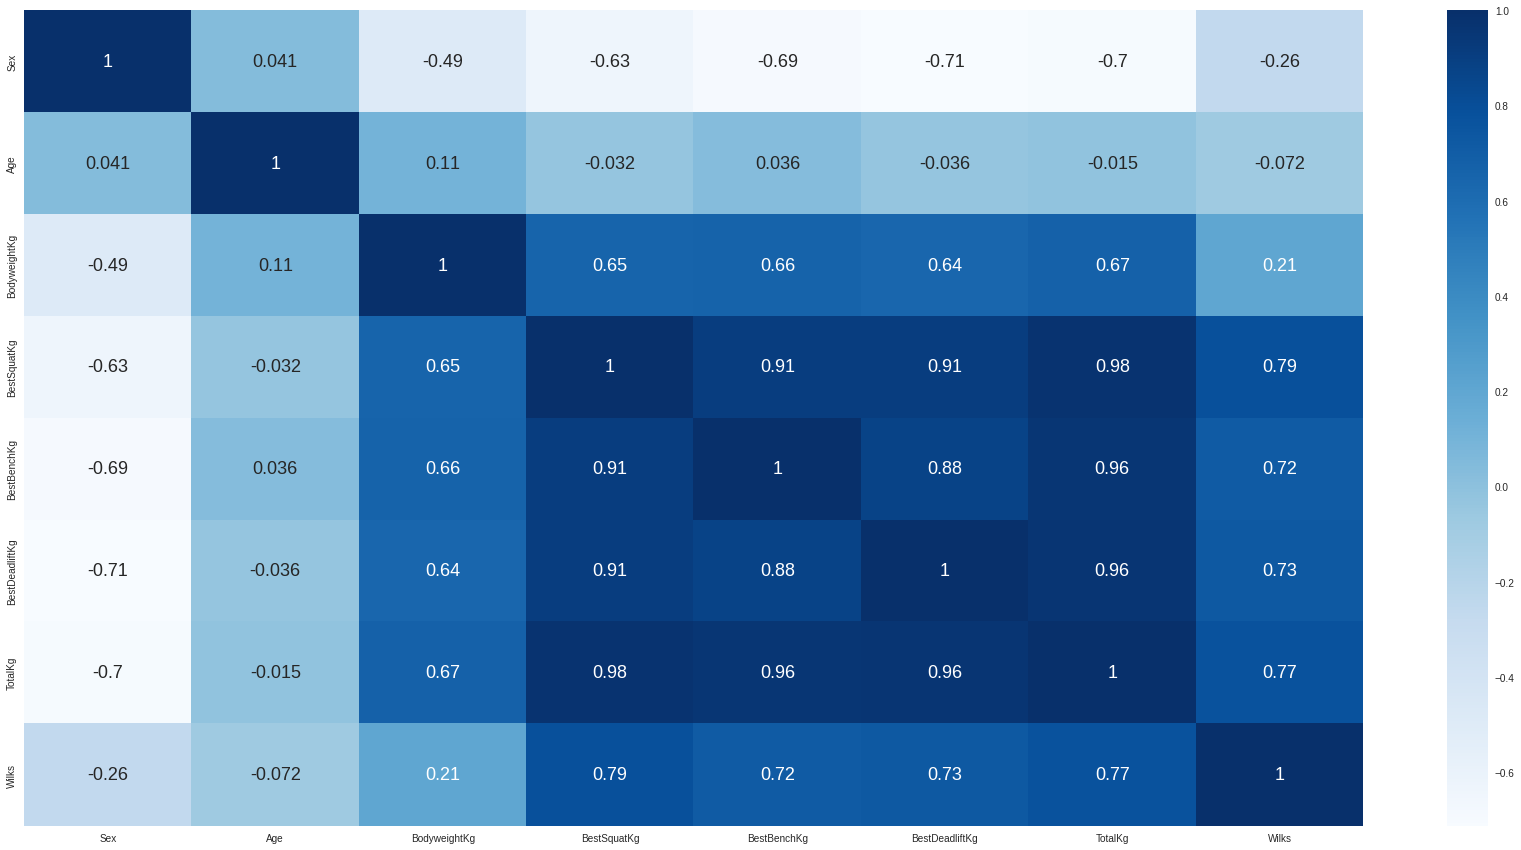

In [59]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(df_classification[df_classification.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [60]:
x = x.drop(['BestSquatKg','BestDeadliftKg', 'BestBenchKg','TotalKg','Wilks'], axis=1)

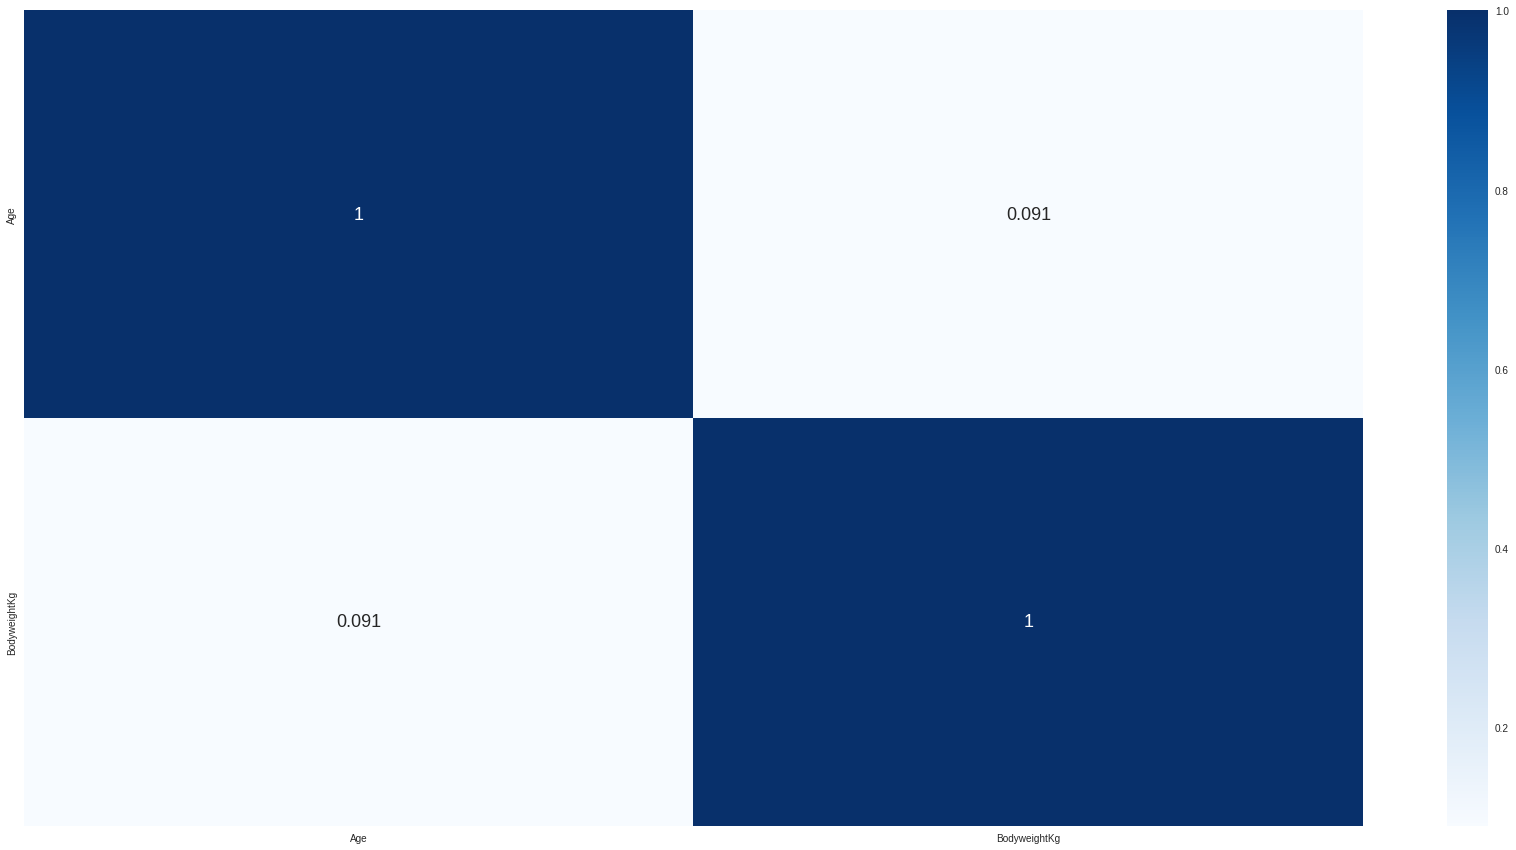

In [61]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [62]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48406, 2)
(20746, 2)
(48406, 1)
(20746, 1)


In [63]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    #SVC(kernel='poly'),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    AdaBoostClassifier(n_estimators=10, random_state=rs)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [64]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.77 	 ---> LogisticRegression 
Accuracy: 0.75 	 ---> DecisionTreeClassifier 
Accuracy: 0.76 	 ---> RandomForestClassifier 
Accuracy: 0.78 	 ---> AdaBoostClassifier 


Text(0.5, 1.0, 'Cross validation scores')

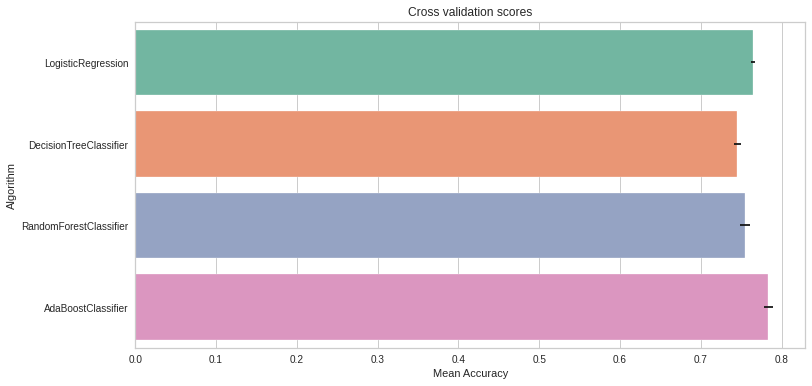

In [65]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

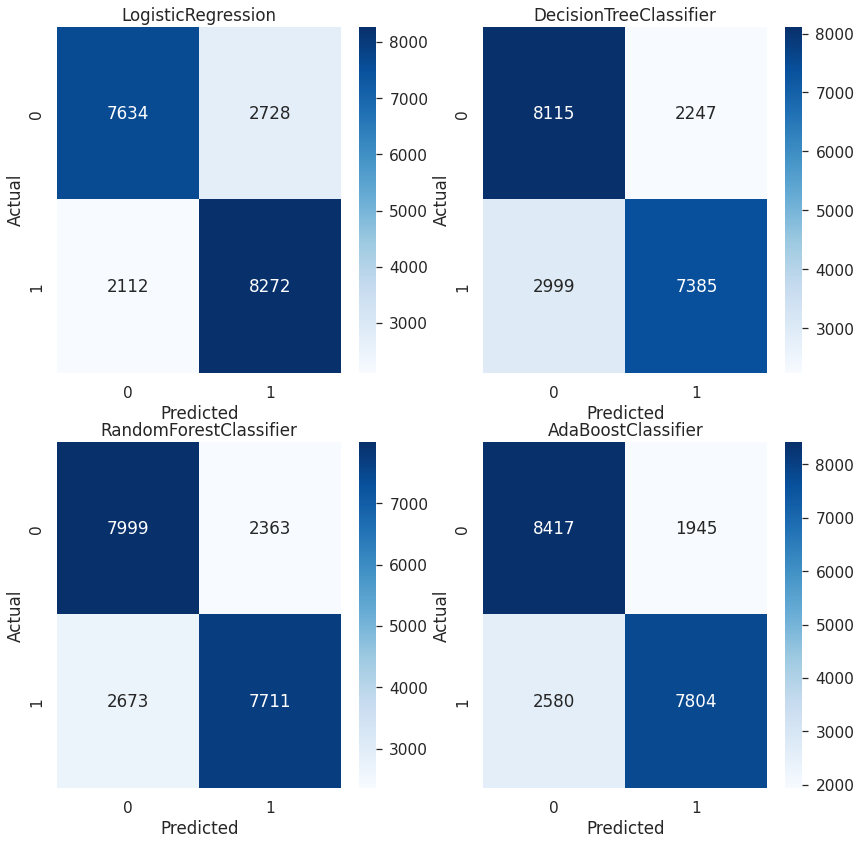

In [66]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(14,14))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(2,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [67]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     10362
           1       0.75      0.80      0.77     10384

    accuracy                           0.77     20746
   macro avg       0.77      0.77      0.77     20746
weighted avg       0.77      0.77      0.77     20746

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.76     10362
           1       0.77      0.71      0.74     10384

    accuracy                           0.75     20746
   macro avg       0.75      0.75      0.75     20746
weighted avg       0.75      0.75      0.75     20746

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     10362
           1       0.77      0.74      0.75     10384

    accuracy                           0.76     

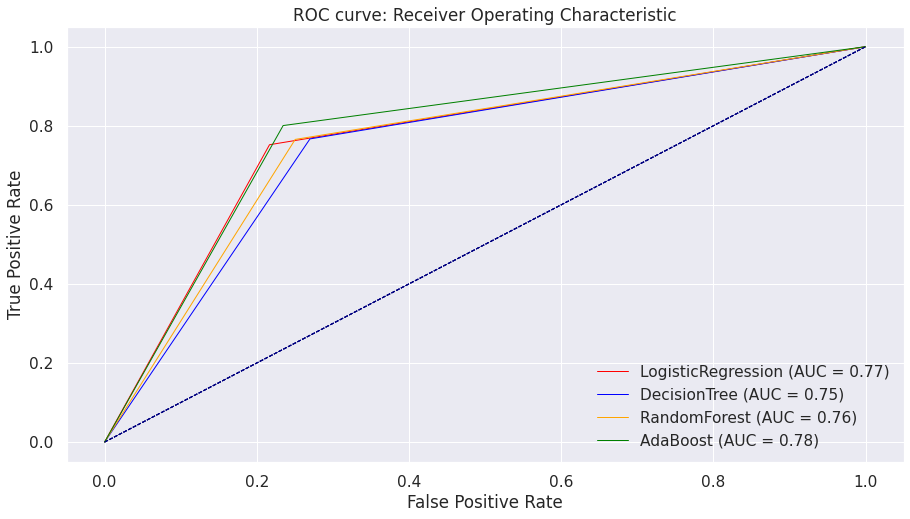

In [68]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")